In [36]:
import matplotlib.pyplot as plt
import numpy as np
import m6_helpers
from pylbm import lbm

In [56]:
x_dim = 30
y_dim = 30
epochs = 10
omega = 1.
top_vel =5

In [59]:
velocities = m6_helpers.m6_1(x_dim=x_dim, y_dim=y_dim, epochs=epochs, omega=omega, top_vel=top_vel)

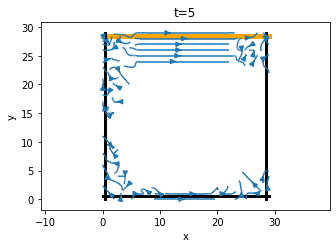

In [60]:
fig = plt.figure(figsize=(30,20))
plt.axis('off')
num_figs = 2
steps = int(len(velocities)/num_figs)
plot_num = 1
for i in range(steps, len(velocities), steps):
    v = velocities[i]
    ax = plt.subplot(5, 5, plot_num)
    # ax.plot(np.arange(x_dim), np.zeros((x_dim)) + y_dim - 0.5, color="black", linewidth=3.0)
    ax.plot(np.arange(x_dim), np.zeros((x_dim)) + y_dim - 1.5, color="orange", linewidth=5.0)
    ax.plot(np.arange(x_dim), np.zeros((x_dim)) + 0.5, color="black", linewidth=3.0)
    ax.plot(np.zeros(y_dim) + 0.5, np.arange((y_dim)), color="black", linewidth=3.0)
    ax.plot(np.zeros(y_dim) + x_dim - 1.5, np.arange((y_dim)), color="black", linewidth=3.0)
    # ax.set_xticks(np.arange(0, x_dim, x_dim / 10))
    # ax.set_yticks(np.arange(0, y_dim, y_dim / 10))
    # ax.grid(True)
    ax.axis("equal")
    # streamplot is really slow at big grids
    strm = ax.streamplot(np.arange(x_dim), np.arange(y_dim), v[0, :, :].T, v[1, :, :].T, cmap="autumn")
    # fig.colorbar(strm.lines)
    ax.set_title("t={}".format(i))
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    plot_num += 1
    fig.add_axes(ax)
    # plt.show()
plt.show()
plt.close()

In [50]:
lbm.reynolds(y_dim,omega,top_vel)

900.0